<a href="https://colab.research.google.com/github/Bishalroybd/Neural-net/blob/main/Diabetic_Retinopathy_csl_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

# APTOS DOWNLOAD


In [7]:
! kaggle datasets download sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0


In [8]:
import zipfile
import os

# 1. Create the 'APTOS' folder if it doesn't exist
aptos_folder = '/content/APTOS'  # Define the path for the new folder
os.makedirs(aptos_folder, exist_ok=True)  # Create the folder

# 2. Define the path to the zip file
zip_file_path = '/content/diabetic-retinopathy-224x224-gaussian-filtered.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the 'APTOS' folder
    zip_ref.extractall(aptos_folder)

print(f"Files extracted to: {aptos_folder}")

Files extracted to: /content/APTOS


In [9]:
import os

def list_folders(path):
  for root, dirs, files in os.walk(path):
    for dir_name in dirs:
      if not any(dir_name.lower().endswith(ext) for ext in ['.png', '.jpg']):
        print(os.path.join(root, dir_name))

list_folders('/content/APTOS')


/content/APTOS/gaussian_filtered_images
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Severe
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Mild
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/No_DR
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Moderate


In [10]:
import os

def count_images(directory):
  """Counts the number of image files in a given directory and its subdirectories.

  Args:
    directory: The path to the directory to search.

  Returns:
    The total number of image files found.
  """
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')  # Add more if needed
  image_count = 0
  for root, _, files in os.walk(directory):
    for file in files:
      if file.lower().endswith(image_extensions):
        image_count += 1
  return image_count

# Example usage (assuming your images are in /content/APTOS):
aptos_image_count = count_images('/content/APTOS')
print(f"Total number of images found in /content/APTOS: {aptos_image_count}")


Total number of images found in /content/APTOS: 3662


# IDRID DOWNLOAD

In [11]:
! kaggle datasets download aaryapatel98/indian-diabetic-retinopathy-image-dataset

Dataset URL: https://www.kaggle.com/datasets/aaryapatel98/indian-diabetic-retinopathy-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [12]:
import zipfile
import os

# 1. Create the IDRID folder if it doesn't exist
idrid_folder = '/content/IDRID'
os.makedirs(idrid_folder, exist_ok=True)

# 2. Define the path to the zip file
zip_file_path = '/content/indian-diabetic-retinopathy-image-dataset.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the IDRID folder
    zip_ref.extractall(idrid_folder)

print(f"Files extracted to: {idrid_folder}")

Files extracted to: /content/IDRID


In [13]:
# IDRID
import os

IDRID_dir = "/content/IDRID"

print("Files in IDRID directory:", os.listdir(IDRID_dir))


Files in IDRID directory: ['A.%20Segmentation', 'B.%20Disease%20Grading', 'C.%20Localization']


In [14]:
def list_folders(path):
  for root, dirs, files in os.walk(path):
    for dir_name in dirs:
      if not any(dir_name.lower().endswith(ext) for ext in ['.png', '.jpg']):
        print(os.path.join(root, dir_name))

list_folders('/content/IDRID')


/content/IDRID/A.%20Segmentation
/content/IDRID/B.%20Disease%20Grading
/content/IDRID/C.%20Localization
/content/IDRID/A.%20Segmentation/A. Segmentation
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths
/content/IDRID/A.%20Segmentation/A. Segmentation/1. Original Images
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/b. Testing Set
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/2. Haemorrhages
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/1. Microaneurysms
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/3. Hard Exudates
/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set/4. Soft Exudates
/content/IDRID/A.%20Segmentation/A. Segmen

In [15]:
import os

def count_images_per_folder(root_dir):
  """Counts images in each subfolder and provides a total count.
  """
  total_images = 0
  for dirpath, dirnames, filenames in os.walk(root_dir):
    image_count = sum(1 for f in filenames if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))
    if image_count > 0:
      print(f"Folder: {dirpath}, Image Count: {image_count}")
      total_images += image_count
  print(f"\nTotal images in {root_dir}: {total_images}")

# Example usage for APTOS dataset
count_images_per_folder('/content/APTOS')

# Example usage for IDRID dataset
count_images_per_folder('/content/IDRID')


Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR, Image Count: 295
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Severe, Image Count: 193
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Mild, Image Count: 370
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/No_DR, Image Count: 1805
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Moderate, Image Count: 999

Total images in /content/APTOS: 3662
Folder: /content/IDRID/A.%20Segmentation/A. Segmentation/1. Original Images/a. Training Set, Image Count: 54
Folder: /content/IDRID/A.%20Segmentation/A. Segmentation/1. Original Images/b. Testing Set, Image Count: 27
Folder: /content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/a. Training Set, Image Count: 413
Folder: /content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/b. Testing Set, Image Count: 103
Folder: /con

# DRIVE DOWNLOAD

In [16]:
! kaggle datasets download andrewmvd/drive-digital-retinal-images-for-vessel-extraction

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction
License(s): other


In [17]:
# Dataset
import zipfile

z = zipfile.ZipFile('/content/drive-digital-retinal-images-for-vessel-extraction.zip')

z.extractall()

In [18]:
# DRIVE
import os

DRIVE_dir = "/content/DRIVE"

print("Files in DRIVE:", os.listdir(DRIVE_dir))

Files in DRIVE: ['training', 'test']


In [19]:
def list_folders(path):
  for root, dirs, files in os.walk(path):
    for dir_name in dirs:
      if not any(dir_name.lower().endswith(ext) for ext in ['.png', '.jpg']):
        print(os.path.join(root, dir_name))

list_folders('/content/DRIVE')


/content/DRIVE/training
/content/DRIVE/test
/content/DRIVE/training/1st_manual
/content/DRIVE/training/mask
/content/DRIVE/training/images
/content/DRIVE/test/mask
/content/DRIVE/test/images


# STARE DOWNLOAD

In [20]:
!mkdir -p /content/STARE


In [21]:
import os

# Create subfolders
os.makedirs("/content/STARE/images", exist_ok=True)
os.makedirs("/content/STARE/labels_ah", exist_ok=True)
os.makedirs("/content/STARE/labels_vk", exist_ok=True)

# Extract files into subfolders
!tar -xvf "/content/drive/MyDrive/Stare /stare-images.tar" -C "/content/STARE/images"
!tar -xvf "/content/drive/MyDrive/Stare /labels-ah.tar" -C "/content/STARE/labels_ah"
!tar -xvf "/content/drive/MyDrive/Stare /labels-vk.tar" -C "/content/STARE/labels_vk"

im0001.ppm.gz
im0002.ppm.gz
im0003.ppm.gz
im0004.ppm.gz
im0005.ppm.gz
im0044.ppm.gz
im0077.ppm.gz
im0081.ppm.gz
im0082.ppm.gz
im0139.ppm.gz
im0162.ppm.gz
im0163.ppm.gz
im0235.ppm.gz
im0236.ppm.gz
im0239.ppm.gz
im0240.ppm.gz
im0255.ppm.gz
im0291.ppm.gz
im0319.ppm.gz
im0324.ppm.gz
im0001.ah.ppm.gz
im0002.ah.ppm.gz
im0003.ah.ppm.gz
im0004.ah.ppm.gz
im0005.ah.ppm.gz
im0044.ah.ppm.gz
im0077.ah.ppm.gz
im0081.ah.ppm.gz
im0082.ah.ppm.gz
im0139.ah.ppm.gz
im0162.ah.ppm.gz
im0163.ah.ppm.gz
im0235.ah.ppm.gz
im0236.ah.ppm.gz
im0239.ah.ppm.gz
im0240.ah.ppm.gz
im0255.ah.ppm.gz
im0291.ah.ppm.gz
im0319.ah.ppm.gz
im0324.ah.ppm.gz
im0001.vk.ppm.gz
im0002.vk.ppm.gz
im0003.vk.ppm.gz
im0004.vk.ppm.gz
im0005.vk.ppm.gz
im0044.vk.ppm.gz
im0077.vk.ppm.gz
im0081.vk.ppm.gz
im0082.vk.ppm.gz
im0139.vk.ppm.gz
im0162.vk.ppm.gz
im0163.vk.ppm.gz
im0235.vk.ppm.gz
im0236.vk.ppm.gz
im0239.vk.ppm.gz
im0240.vk.ppm.gz
im0255.vk.ppm.gz
im0291.vk.ppm.gz
im0319.vk.ppm.gz
im0324.vk.ppm.gz


In [22]:
import os
print("Extracted Files in STARE Directory:", os.listdir("/content/STARE"))


Extracted Files in STARE Directory: ['labels_vk', 'labels_ah', 'images']


In [23]:
import os
import gzip
import shutil
from glob import glob

STARE_RAW_PATH = "/content/STARE"

def extract_gz_files(input_dir):
    """Extracts all .ppm.gz files in a directory."""
    for file_path in glob(os.path.join(input_dir, "*.gz")):
        output_path = file_path.replace(".gz", "")
        with gzip.open(file_path, 'rb') as f_in, open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"✅ Extracted all .ppm.gz files in {input_dir}")

# Extract for images & masks
extract_gz_files(f"{STARE_RAW_PATH}/images")
extract_gz_files(f"{STARE_RAW_PATH}/labels_ah")
extract_gz_files(f"{STARE_RAW_PATH}/labels_vk")


✅ Extracted all .ppm.gz files in /content/STARE/images
✅ Extracted all .ppm.gz files in /content/STARE/labels_ah
✅ Extracted all .ppm.gz files in /content/STARE/labels_vk


In [24]:
import cv2
import numpy as np
from tqdm import tqdm

# Define target directories for preprocessed data
SAVE_PATH = "/content/preprocessed_stare"
os.makedirs(f"{SAVE_PATH}/images", exist_ok=True)
os.makedirs(f"{SAVE_PATH}/labels-ah", exist_ok=True)
os.makedirs(f"{SAVE_PATH}/labels-vk", exist_ok=True)

IMG_SIZE = (256, 256)  # Resize all images

def convert_and_save_ppm_to_npy(input_dir, output_dir, is_mask=False):
    """Converts .ppm files to NumPy array, resizes, normalizes, and saves them."""
    for ppm_file in tqdm(glob(os.path.join(input_dir, "*.ppm")), desc=f"Processing {input_dir}"):
        img = cv2.imread(ppm_file, cv2.IMREAD_UNCHANGED)
        if img is None:
            print(f"⚠️ Skipping corrupt file: {ppm_file}")
            continue

        img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_AREA)

        # Convert masks to grayscale if they are not single-channel
        if is_mask and len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img = img.astype(np.float32) / 255.0  # Normalize

        filename = os.path.basename(ppm_file).replace(".ppm", ".npy")
        np.save(os.path.join(output_dir, filename), img)

# Convert and save images & masks
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/images", f"{SAVE_PATH}/images", is_mask=False)
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/labels_ah", f"{SAVE_PATH}/labels-ah", is_mask=True)
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/labels_vk", f"{SAVE_PATH}/labels-vk", is_mask=True)

print(f"✅ STARE Preprocessing Complete! NumPy arrays saved in {SAVE_PATH}")


Processing /content/STARE/labels_vk: 100%|██████████| 20/20 [00:00<00:00, 438.60it/s]

✅ STARE Preprocessing Complete! NumPy arrays saved in /content/preprocessed_stare


# APTOS PRE_PROCESSING

In [25]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Define image size
IMG_SIZE = (256, 256)

def preprocess_image(image_path):
    """Reads an image, resizes it, normalizes pixel values, and applies CLAHE."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Skipping corrupt image: {image_path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, IMG_SIZE)  # Resize to fixed dimensions
    img = img / 255.0  # Normalize to [0,1]

    # Apply CLAHE for contrast enhancement
    lab = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB) / 255.0  # Normalize again

    return img


In [26]:
# Define APTOS dataset path
APTOS_PATH = "/content/APTOS/gaussian_filtered_images/gaussian_filtered_images"
SAVE_DIR = "/content/preprocessed_aptos"

# Create save directory
os.makedirs(SAVE_DIR, exist_ok=True)

# Process images
for category in os.listdir(APTOS_PATH):  # Categories: No_DR, Mild, etc.
    category_path = os.path.join(APTOS_PATH, category)
    if not os.path.isdir(category_path):
        continue

    save_category_path = os.path.join(SAVE_DIR, category)
    os.makedirs(save_category_path, exist_ok=True)

    for img_name in tqdm(os.listdir(category_path), desc=f"Processing {category}"):
        img_path = os.path.join(category_path, img_name)
        img = preprocess_image(img_path)
        if img is not None:
            np.save(os.path.join(save_category_path, img_name.replace('.jpg', '.npy')), img)

print(f"✅ Preprocessed APTOS images saved in {SAVE_DIR}")


Processing Moderate: 100%|██████████| 999/999 [00:15<00:00, 63.37it/s]

✅ Preprocessed APTOS images saved in /content/preprocessed_aptos


In [27]:
import os

# Count number of preprocessed images
preprocessed_count = sum([len(files) for _, _, files in os.walk(SAVE_DIR)])
print(f"📂 Total Preprocessed APTOS Images: {preprocessed_count}")

# List a few sample files
print("📌 Sample Files:", os.listdir(SAVE_DIR + "/No_DR")[:5])


📂 Total Preprocessed APTOS Images: 3662
📌 Sample Files: ['b5204c0decc7.png.npy', '87a9f4d20f07.png.npy', '51a078d6d43a.png.npy', 'a8aed92940fb.png.npy', '894a37fc3738.png.npy']


In [28]:
import os
import matplotlib.pyplot as plt

# Define preprocessed dataset path
PREPROCESSED_APTOS_PATH = "/content/preprocessed_aptos"

# Count the number of images in each category
category_counts = {}
for category in os.listdir(PREPROCESSED_APTOS_PATH):
    category_path = os.path.join(PREPROCESSED_APTOS_PATH, category)
    if os.path.isdir(category_path):
        category_counts[category] = len(os.listdir(category_path))

# Print counts
for category, count in category_counts.items():
    print(f"📂 {category}: {count} images")


📂 Proliferate_DR: 295 images
📂 Severe: 193 images
📂 Mild: 370 images
📂 No_DR: 1805 images
📂 Moderate: 999 images


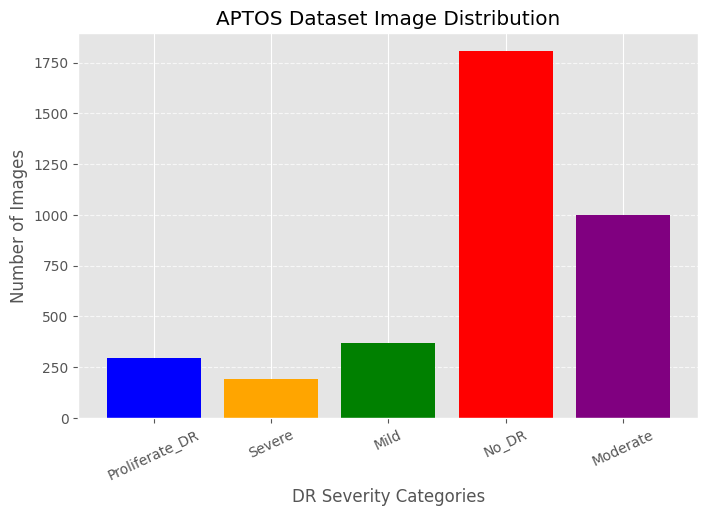

In [29]:
# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(category_counts.keys(), category_counts.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("DR Severity Categories")
plt.ylabel("Number of Images")
plt.title("APTOS Dataset Image Distribution")
plt.xticks(rotation=25)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# IDRID PRE_PROCESSING

In [30]:
# Preprocess IDRiD Fundus Images

In [31]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Define image size
IMG_SIZE = (256, 256)

def preprocess_image(image_path):
    """Reads an image, resizes it, normalizes pixel values, and applies CLAHE."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Skipping corrupt image: {image_path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0

    # Apply CLAHE for contrast enhancement
    lab = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB) / 255.0

    return img


In [32]:
# Define IDRiD dataset path
IDRID_PATH = "/content/IDRID/A.%20Segmentation/A. Segmentation/1. Original Images"
SAVE_DIR = "/content/preprocessed_idrid"

# Create save directory
os.makedirs(SAVE_DIR, exist_ok=True)

# Process images
for category in os.listdir(IDRID_PATH):  # Training & Testing folders
    category_path = os.path.join(IDRID_PATH, category)
    if not os.path.isdir(category_path):
        continue

    save_category_path = os.path.join(SAVE_DIR, category)
    os.makedirs(save_category_path, exist_ok=True)

    for img_name in tqdm(os.listdir(category_path), desc=f"Processing {category}"):
        img_path = os.path.join(category_path, img_name)
        img = preprocess_image(img_path)
        if img is not None:
            np.save(os.path.join(save_category_path, img_name.replace('.jpg', '.npy')), img)

print(f"✅ Preprocessed IDRiD images saved in {SAVE_DIR}")


Processing b. Testing Set: 100%|██████████| 27/27 [00:02<00:00,  9.04it/s]

✅ Preprocessed IDRiD images saved in /content/preprocessed_idrid


In [33]:
# Preprocess IDRiD Lesion Segmentation Masks

In [34]:
def preprocess_mask(mask_path):
    """Reads a mask, resizes, converts to grayscale, and normalizes."""
    mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
    if mask is None:
        print(f"⚠️ Skipping corrupt mask: {mask_path}")
        return None

    mask = cv2.resize(mask, IMG_SIZE)

    # Convert to grayscale if not already
    if len(mask.shape) == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    mask = mask / 255.0
    return mask


In [35]:
# Define IDRiD mask dataset path
IDRID_MASK_PATH = "/content/IDRID/A.%20Segmentation/A. Segmentation/2. All Segmentation Groundtruths/a. Training Set"
SAVE_MASK_DIR = "/content/preprocessed_idrid_masks"

# Create save directory
os.makedirs(SAVE_MASK_DIR, exist_ok=True)

# Process masks
for lesion_type in os.listdir(IDRID_MASK_PATH):  # Lesion folders (Microaneurysms, etc.)
    lesion_path = os.path.join(IDRID_MASK_PATH, lesion_type)
    if not os.path.isdir(lesion_path):
        continue

    save_lesion_path = os.path.join(SAVE_MASK_DIR, lesion_type)
    os.makedirs(save_lesion_path, exist_ok=True)

    for mask_name in tqdm(os.listdir(lesion_path), desc=f"Processing {lesion_type}"):
        mask_path = os.path.join(lesion_path, mask_name)
        mask = preprocess_mask(mask_path)
        if mask is not None:
            np.save(os.path.join(save_lesion_path, mask_name.replace('.tif', '.npy')), mask)

print(f"✅ Preprocessed IDRiD lesion masks saved in {SAVE_MASK_DIR}")


Processing 5. Optic Disc: 100%|██████████| 54/54 [00:02<00:00, 20.58it/s]

✅ Preprocessed IDRiD lesion masks saved in /content/preprocessed_idrid_masks


In [36]:
import os

# Count number of preprocessed images
idrid_img_count = sum([len(files) for _, _, files in os.walk(SAVE_DIR)])
idrid_mask_count = sum([len(files) for _, _, files in os.walk(SAVE_MASK_DIR)])

print(f"📂 Total Preprocessed IDRiD Fundus Images: {idrid_img_count}")
print(f"📂 Total Preprocessed IDRiD Lesion Masks: {idrid_mask_count}")


📂 Total Preprocessed IDRiD Fundus Images: 81
📂 Total Preprocessed IDRiD Lesion Masks: 241


# STARE PRE_PROCESSING

In [37]:
import os
import gzip
import shutil
from glob import glob

STARE_RAW_PATH = "/content/STARE"

def extract_gz_files(input_dir):
    """Extracts all .ppm.gz files in a directory."""
    for file_path in glob(os.path.join(input_dir, "*.gz")):
        output_path = file_path.replace(".gz", "")
        with gzip.open(file_path, 'rb') as f_in, open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"✅ Extracted all .ppm.gz files in {input_dir}")

# Extract for images & masks
extract_gz_files(f"{STARE_RAW_PATH}/images")
extract_gz_files(f"{STARE_RAW_PATH}/labels_ah")
extract_gz_files(f"{STARE_RAW_PATH}/labels_vk")


✅ Extracted all .ppm.gz files in /content/STARE/images
✅ Extracted all .ppm.gz files in /content/STARE/labels_ah
✅ Extracted all .ppm.gz files in /content/STARE/labels_vk


In [38]:
import cv2
import numpy as np
from tqdm import tqdm

# Define save paths
SAVE_PATH = "/content/preprocessed_stare"
os.makedirs(f"{SAVE_PATH}/images", exist_ok=True)
os.makedirs(f"{SAVE_PATH}/labels-ah", exist_ok=True)
os.makedirs(f"{SAVE_PATH}/labels-vk", exist_ok=True)

IMG_SIZE = (256, 256)  # Resize all images

def convert_and_save_ppm_to_npy(input_dir, output_dir, is_mask=False):
    """Converts .ppm files to NumPy array, resizes, normalizes, and saves them."""
    for ppm_file in tqdm(glob(os.path.join(input_dir, "*.ppm")), desc=f"Processing {input_dir}"):
        img = cv2.imread(ppm_file, cv2.IMREAD_UNCHANGED)
        if img is None:
            print(f"⚠️ Skipping corrupt file: {ppm_file}")
            continue

        img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_AREA)

        # Convert masks to grayscale if they are not single-channel
        if is_mask and len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img = img.astype(np.float32) / 255.0  # Normalize

        filename = os.path.basename(ppm_file).replace(".ppm", ".npy")
        np.save(os.path.join(output_dir, filename), img)

# Convert and save fundus images & masks
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/images", f"{SAVE_PATH}/images", is_mask=False)
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/labels_ah", f"{SAVE_PATH}/labels-ah", is_mask=True)
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/labels_vk", f"{SAVE_PATH}/labels-vk", is_mask=True)

print(f"✅ STARE Preprocessing Complete! NumPy arrays saved in {SAVE_PATH}")


Processing /content/STARE/labels_vk: 100%|██████████| 20/20 [00:00<00:00, 247.44it/s]

✅ STARE Preprocessing Complete! NumPy arrays saved in /content/preprocessed_stare


In [39]:
import os

# Check the number of processed images & masks
stare_image_count = len(os.listdir(f"{SAVE_PATH}/images"))
stare_ah_mask_count = len(os.listdir(f"{SAVE_PATH}/labels-ah"))
stare_vk_mask_count = len(os.listdir(f"{SAVE_PATH}/labels-vk"))

print(f"📂 STARE Preprocessed Images: {stare_image_count}")
print(f"📂 STARE Preprocessed AH Masks: {stare_ah_mask_count}")
print(f"📂 STARE Preprocessed VK Masks: {stare_vk_mask_count}")


📂 STARE Preprocessed Images: 20
📂 STARE Preprocessed AH Masks: 20
📂 STARE Preprocessed VK Masks: 20


# DRIVE PRE_PROCESSING


In [40]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from glob import glob
from imageio import imread

# Define image size
IMG_SIZE = (256, 256)

def preprocess_fundus_image(image_path):
    """Reads, resizes, normalizes, and enhances fundus images."""
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"⚠️ Skipping corrupt image: {image_path}")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0  # Normalize to [0,1]

    return img

def preprocess_vessel_mask(mask_path):
    """Reads, resizes, converts to grayscale, and normalizes vessel masks."""
    mask = imread(mask_path)  # Reads .gif files
    if mask is None:
        print(f"⚠️ Skipping corrupt mask: {mask_path}")
        return None

    mask = cv2.resize(mask, IMG_SIZE, interpolation=cv2.INTER_NEAREST)
    if len(mask.shape) == 3:  # Ensure grayscale
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    mask = mask.astype(np.float32) / 255.0  # Normalize to [0,1]
    return mask


In [41]:
# Define dataset paths
DRIVE_PATH = "/content/DRIVE"
SAVE_DIR = "/content/preprocessed_drive"

# Create directories for preprocessed data
os.makedirs(f"{SAVE_DIR}/training/images", exist_ok=True)
os.makedirs(f"{SAVE_DIR}/training/1st_manual", exist_ok=True)
os.makedirs(f"{SAVE_DIR}/training/mask", exist_ok=True)
os.makedirs(f"{SAVE_DIR}/test/images", exist_ok=True)
os.makedirs(f"{SAVE_DIR}/test/mask", exist_ok=True)

# Preprocess fundus images
for dataset_type in ["training", "test"]:
    img_dir = os.path.join(DRIVE_PATH, dataset_type, "images")
    save_img_dir = os.path.join(SAVE_DIR, dataset_type, "images")

    for img_name in tqdm(os.listdir(img_dir), desc=f"Processing {dataset_type} fundus images"):
        img_path = os.path.join(img_dir, img_name)
        img = preprocess_fundus_image(img_path)
        if img is not None:
            np.save(os.path.join(save_img_dir, img_name.replace('.tif', '.npy')), img)

# Preprocess vessel masks
for dataset_type in ["training", "test"]:
    mask_dir = os.path.join(DRIVE_PATH, dataset_type, "mask")
    save_mask_dir = os.path.join(SAVE_DIR, dataset_type, "mask")

    for mask_name in tqdm(os.listdir(mask_dir), desc=f"Processing {dataset_type} masks"):
        mask_path = os.path.join(mask_dir, mask_name)
        mask = preprocess_vessel_mask(mask_path)
        if mask is not None:
            np.save(os.path.join(save_mask_dir, mask_name.replace('.gif', '.npy')), mask)

# Preprocess training manual segmentation masks
train_manual_dir = os.path.join(DRIVE_PATH, "training", "1st_manual")
save_train_manual_dir = os.path.join(SAVE_DIR, "training", "1st_manual")

for mask_name in tqdm(os.listdir(train_manual_dir), desc="Processing training manual segmentation masks"):
    mask_path = os.path.join(train_manual_dir, mask_name)
    mask = preprocess_vessel_mask(mask_path)
    if mask is not None:
        np.save(os.path.join(save_train_manual_dir, mask_name.replace('.gif', '.npy')), mask)

print(f"✅ Preprocessed DRIVE dataset saved in {SAVE_DIR}")


Processing training masks:   0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-40-e6295577626c>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imread(mask_path)  # Reads .gif files
Processing training manual segmentation masks: 100%|██████████| 20/20 [00:00<00:00, 257.79it/s]

✅ Preprocessed DRIVE dataset saved in /content/preprocessed_drive


In [42]:
# Count the number of preprocessed images & masks
train_img_count = len(os.listdir(f"{SAVE_DIR}/training/images"))
train_mask_count = len(os.listdir(f"{SAVE_DIR}/training/mask"))
train_manual_count = len(os.listdir(f"{SAVE_DIR}/training/1st_manual"))
test_img_count = len(os.listdir(f"{SAVE_DIR}/test/images"))
test_mask_count = len(os.listdir(f"{SAVE_DIR}/test/mask"))

print(f"📂 Preprocessed Training Fundus Images: {train_img_count}")
print(f"📂 Preprocessed Training Vessel Masks: {train_mask_count}")
print(f"📂 Preprocessed Training Manual Segmentation: {train_manual_count}")
print(f"📂 Preprocessed Test Fundus Images: {test_img_count}")
print(f"📂 Preprocessed Test Vessel Masks: {test_mask_count}")


📂 Preprocessed Training Fundus Images: 20
📂 Preprocessed Training Vessel Masks: 20
📂 Preprocessed Training Manual Segmentation: 20
📂 Preprocessed Test Fundus Images: 20
📂 Preprocessed Test Vessel Masks: 20


# APTOS Augmentation

In [62]:
import albumentations as A
import cv2
import numpy as np
import os
from tqdm import tqdm

# APTOS Augmentation Pipeline
aptos_augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2),
])

# Define paths
APTOS_PATH = "/content/preprocessed_aptos"
AUGMENTED_APTOS_PATH = "/content/augmented_aptos"

# Create augmented save directory if it doesn't exist
os.makedirs(AUGMENTED_APTOS_PATH, exist_ok=True)

def augment_fundus_images_with_original(input_dir, save_dir, augmentations_per_image=3):
    """For each category, saves the original image (converted to jpg) plus 3 augmented copies."""
    for category in os.listdir(input_dir):
        category_path = os.path.join(input_dir, category)
        save_category_path = os.path.join(save_dir, category)
        os.makedirs(save_category_path, exist_ok=True)

        for img_name in tqdm(os.listdir(category_path), desc=f"Augmenting {category}"):
            if not img_name.endswith('.npy'):
                continue
            img_path = os.path.join(category_path, img_name)
            img = np.load(img_path)
            img_uint8 = (img * 255).astype(np.uint8)

            # Save the original image
            original_save_path = os.path.join(save_category_path, img_name.replace('.npy', '.jpg'))
            cv2.imwrite(original_save_path, img_uint8)

            # Create augmented versions
            for i in range(augmentations_per_image):
                augmented = aptos_augment(image=img_uint8)["image"]
                aug_save_path = os.path.join(save_category_path, f"aug_{i}_{img_name.replace('.npy', '.jpg')}")
                cv2.imwrite(aug_save_path, augmented)

augment_fundus_images_with_original(APTOS_PATH, AUGMENTED_APTOS_PATH, augmentations_per_image=3)
print("✅ APTOS Augmentation Complete!")


Augmenting Moderate: 100%|██████████| 999/999 [00:17<00:00, 57.24it/s]

✅ APTOS Augmentation Complete!


# IDRiD Augmentation

In [63]:
import albumentations as A
import cv2
import numpy as np
import os
from tqdm import tqdm

idrid_augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.ElasticTransform(p=0.2),
])

IDRID_PATH = "/content/preprocessed_idrid"  # Fundus images
AUGMENTED_IDRID_PATH = "/content/augmented_idrid"

os.makedirs(AUGMENTED_IDRID_PATH, exist_ok=True)

def augment_idrid_images_with_original(input_dir, save_dir, augmentations_per_image=3):
    """Saves original IDRiD fundus images (as jpg) plus 3 augmented versions."""
    for category in os.listdir(input_dir):
        category_path = os.path.join(input_dir, category)
        save_category_path = os.path.join(save_dir, category)
        os.makedirs(save_category_path, exist_ok=True)

        for img_name in tqdm(os.listdir(category_path), desc=f"Augmenting {category} Images"):
            if not img_name.endswith('.npy'):
                continue
            img_path = os.path.join(category_path, img_name)
            img = np.load(img_path)
            img_uint8 = (img * 255).astype(np.uint8)

            # Save original
            original_save_path = os.path.join(save_category_path, img_name.replace('.npy', '.jpg'))
            cv2.imwrite(original_save_path, img_uint8)

            for i in range(augmentations_per_image):
                augmented = idrid_augment(image=img_uint8)["image"]
                aug_save_path = os.path.join(save_category_path, f"aug_{i}_{img_name.replace('.npy', '.jpg')}")
                cv2.imwrite(aug_save_path, augmented)

augment_idrid_images_with_original(IDRID_PATH, AUGMENTED_IDRID_PATH, augmentations_per_image=3)
print("✅ IDRiD Fundus Images Augmentation Complete!")


Augmenting b. Testing Set Images: 100%|██████████| 27/27 [00:00<00:00, 50.20it/s]

✅ IDRiD Fundus Images Augmentation Complete!


In [64]:
IDRID_MASK_PATH = "/content/preprocessed_idrid_masks"  # Lesion masks (subfolders for each lesion type)
AUGMENTED_IDRID_MASKS = "/content/augmented_idrid_masks"

os.makedirs(AUGMENTED_IDRID_MASKS, exist_ok=True)

def augment_idrid_masks_with_original(mask_dir, save_dir, augmentations_per_image=3):
    """Saves original lesion masks plus 3 augmented versions, for each lesion type."""
    for lesion_type in os.listdir(mask_dir):
        lesion_path = os.path.join(mask_dir, lesion_type)
        save_lesion_path = os.path.join(save_dir, lesion_type)
        os.makedirs(save_lesion_path, exist_ok=True)

        for mask_name in tqdm(os.listdir(lesion_path), desc=f"Augmenting {lesion_type} Masks"):
            if not mask_name.endswith('.npy'):
                continue
            mask_path = os.path.join(lesion_path, mask_name)
            mask = np.load(mask_path)
            mask_uint8 = (mask * 255).astype(np.uint8)

            # Save original mask
            original_save_path = os.path.join(save_lesion_path, mask_name.replace('.npy', '.jpg'))
            cv2.imwrite(original_save_path, mask_uint8)

            for i in range(augmentations_per_image):
                augmented_mask = idrid_augment(image=mask_uint8)["image"]
                aug_save_path = os.path.join(save_lesion_path, f"aug_{i}_{mask_name.replace('.npy', '.jpg')}")
                cv2.imwrite(aug_save_path, augmented_mask)

augment_idrid_masks_with_original(IDRID_MASK_PATH, AUGMENTED_IDRID_MASKS, augmentations_per_image=3)
print("✅ IDRiD Lesion Masks Augmentation Complete!")


Augmenting 5. Optic Disc Masks: 100%|██████████| 54/54 [00:00<00:00, 99.60it/s]

✅ IDRiD Lesion Masks Augmentation Complete!


# STARE Augmentation

In [65]:
import albumentations as A
import cv2
import numpy as np
import os
from tqdm import tqdm

stare_augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.GaussianBlur(p=0.3),
    A.ElasticTransform(p=0.2),
], additional_targets={"mask_ah": "image", "mask_vk": "image"})

STARE_IMAGE_PATH = "/content/preprocessed_stare/images"
STARE_AH_MASK_PATH = "/content/preprocessed_stare/labels-ah"
STARE_VK_MASK_PATH = "/content/preprocessed_stare/labels-vk"

AUG_STARE_IMAGE_PATH = "/content/augmented_stare/images"
AUG_STARE_AH_PATH = "/content/augmented_stare/labels-ah"
AUG_STARE_VK_PATH = "/content/augmented_stare/labels-vk"

os.makedirs(AUG_STARE_IMAGE_PATH, exist_ok=True)
os.makedirs(AUG_STARE_AH_PATH, exist_ok=True)
os.makedirs(AUG_STARE_VK_PATH, exist_ok=True)

def augment_stare_images_and_masks_with_original(image_dir, ah_mask_dir, vk_mask_dir, save_image_dir, save_ah_dir, save_vk_dir, augmentations_per_image=3):
    """Augments STARE fundus images & corresponding masks, saving original + augmentations."""
    for img_name in tqdm(os.listdir(image_dir), desc="Augmenting STARE Images & Masks"):
        if not img_name.endswith('.npy'):
            continue
        img_path = os.path.join(image_dir, img_name)
        ah_mask_name = img_name.replace('.npy', '.ah.npy')
        vk_mask_name = img_name.replace('.npy', '.vk.npy')

        ah_mask_path = os.path.join(ah_mask_dir, ah_mask_name)
        vk_mask_path = os.path.join(vk_mask_dir, vk_mask_name)

        if not (os.path.exists(ah_mask_path) and os.path.exists(vk_mask_path)):
            print(f"⚠️ Skipping {img_name} (Missing Mask)")
            continue

        img = np.load(img_path)
        ah_mask = np.load(ah_mask_path)
        vk_mask = np.load(vk_mask_path)

        img_uint8 = (img * 255).astype(np.uint8)
        ah_mask_uint8 = (ah_mask * 255).astype(np.uint8)
        vk_mask_uint8 = (vk_mask * 255).astype(np.uint8)

        # Save original image & masks
        orig_img_save = os.path.join(save_image_dir, img_name.replace('.npy', '.jpg'))
        orig_ah_save = os.path.join(save_ah_dir, ah_mask_name.replace('.npy', '.jpg'))
        orig_vk_save = os.path.join(save_vk_dir, vk_mask_name.replace('.npy', '.jpg'))
        cv2.imwrite(orig_img_save, img_uint8)
        cv2.imwrite(orig_ah_save, ah_mask_uint8)
        cv2.imwrite(orig_vk_save, vk_mask_uint8)

        for i in range(augmentations_per_image):
            augmented = stare_augment(image=img_uint8, mask_ah=ah_mask_uint8, mask_vk=vk_mask_uint8)
            aug_img_save = os.path.join(save_image_dir, f"aug_{i}_{img_name.replace('.npy', '.jpg')}")
            aug_ah_save = os.path.join(save_ah_dir, f"aug_{i}_{ah_mask_name.replace('.npy', '.jpg')}")
            aug_vk_save = os.path.join(save_vk_dir, f"aug_{i}_{vk_mask_name.replace('.npy', '.jpg')}")

            cv2.imwrite(aug_img_save, augmented["image"])
            cv2.imwrite(aug_ah_save, augmented["mask_ah"])
            cv2.imwrite(aug_vk_save, augmented["mask_vk"])

augment_stare_images_and_masks_with_original(STARE_IMAGE_PATH, STARE_AH_MASK_PATH, STARE_VK_MASK_PATH, AUG_STARE_IMAGE_PATH, AUG_STARE_AH_PATH, AUG_STARE_VK_PATH, augmentations_per_image=3)
print("✅ STARE Augmentation Complete!")


Augmenting STARE Images & Masks: 100%|██████████| 20/20 [00:00<00:00, 27.39it/s]

✅ STARE Augmentation Complete!


# DRIVE Augmentation

In [66]:
import albumentations as A
import cv2
import numpy as np
import os
from tqdm import tqdm

drive_augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.GaussianBlur(p=0.3),
    A.ElasticTransform(p=0.2),
], additional_targets={"mask_vessel": "image", "mask_manual": "image"})

DRIVE_IMAGE_TRAIN_PATH = "/content/preprocessed_drive/training/images"
DRIVE_MASK_TRAIN_PATH = "/content/preprocessed_drive/training/mask"
DRIVE_MANUAL_TRAIN_PATH = "/content/preprocessed_drive/training/1st_manual"

AUG_IMAGE_TRAIN_PATH = "/content/augmented_drive/training/images"
AUG_MASK_TRAIN_PATH = "/content/augmented_drive/training/mask"
AUG_MANUAL_TRAIN_PATH = "/content/augmented_drive/training/1st_manual"

os.makedirs(AUG_IMAGE_TRAIN_PATH, exist_ok=True)
os.makedirs(AUG_MASK_TRAIN_PATH, exist_ok=True)
os.makedirs(AUG_MANUAL_TRAIN_PATH, exist_ok=True)

def augment_drive_train_set_with_original(image_dir, mask_dir, manual_dir, save_image_dir, save_mask_dir, save_manual_dir, augmentations_per_image=3):
    """Augments DRIVE training images & corresponding vessel and manual masks, saving original + augmentations."""
    for img_name in tqdm(os.listdir(image_dir), desc="Augmenting DRIVE Training Set"):
        if not img_name.endswith('.npy'):
            continue
        img_path = os.path.join(image_dir, img_name)
        # Generate correct mask filenames based on given example:
        # For an image named "21_training.npy", the vessel mask is "21_training_mask.npy" and manual mask is "21_manual1.npy"
        mask_name = img_name.replace("_training.npy", "_training_mask.npy")
        manual_name = img_name.replace("_training.npy", "_manual1.npy")

        mask_path = os.path.join(mask_dir, mask_name)
        manual_path = os.path.join(manual_dir, manual_name)

        if not (os.path.exists(mask_path) and os.path.exists(manual_path)):
            print(f"⚠️ Skipping {img_name} (Missing Mask)")
            continue

        img = np.load(img_path)
        mask = np.load(mask_path)
        manual = np.load(manual_path)

        img_uint8 = (img * 255).astype(np.uint8)
        mask_uint8 = (mask * 255).astype(np.uint8)
        manual_uint8 = (manual * 255).astype(np.uint8)

        # Save original files (as .jpg)
        orig_img_save = os.path.join(save_image_dir, img_name.replace('.npy', '.jpg'))
        orig_mask_save = os.path.join(save_mask_dir, mask_name.replace('.npy', '.jpg'))
        orig_manual_save = os.path.join(save_manual_dir, manual_name.replace('.npy', '.jpg'))
        cv2.imwrite(orig_img_save, img_uint8)
        cv2.imwrite(orig_mask_save, mask_uint8)
        cv2.imwrite(orig_manual_save, manual_uint8)

        for i in range(augmentations_per_image):
            augmented = drive_augment(image=img_uint8, mask_vessel=mask_uint8, mask_manual=manual_uint8)

            aug_img_save = os.path.join(save_image_dir, f"aug_{i}_{img_name.replace('.npy', '.jpg')}")
            aug_mask_save = os.path.join(save_mask_dir, f"aug_{i}_{mask_name.replace('.npy', '.jpg')}")
            aug_manual_save = os.path.join(save_manual_dir, f"aug_{i}_{manual_name.replace('.npy', '.jpg')}")

            cv2.imwrite(aug_img_save, augmented["image"])
            cv2.imwrite(aug_mask_save, augmented["mask_vessel"])
            cv2.imwrite(aug_manual_save, augmented["mask_manual"])

augment_drive_train_set_with_original(DRIVE_IMAGE_TRAIN_PATH, DRIVE_MASK_TRAIN_PATH, DRIVE_MANUAL_TRAIN_PATH,
                                        AUG_IMAGE_TRAIN_PATH, AUG_MASK_TRAIN_PATH, AUG_MANUAL_TRAIN_PATH, augmentations_per_image=3)
print("✅ DRIVE Training Set Augmentation Complete!")


Augmenting DRIVE Training Set: 100%|██████████| 20/20 [00:00<00:00, 26.66it/s]

✅ DRIVE Training Set Augmentation Complete!


In [67]:
DRIVE_IMAGE_TEST_PATH = "/content/preprocessed_drive/test/images"
DRIVE_MASK_TEST_PATH = "/content/preprocessed_drive/test/mask"

AUG_IMAGE_TEST_PATH = "/content/augmented_drive/test/images"
AUG_MASK_TEST_PATH = "/content/augmented_drive/test/mask"

os.makedirs(AUG_IMAGE_TEST_PATH, exist_ok=True)
os.makedirs(AUG_MASK_TEST_PATH, exist_ok=True)

def augment_drive_test_set_with_original(image_dir, mask_dir, save_image_dir, save_mask_dir, augmentations_per_image=3):
    """Augments DRIVE test images & corresponding vessel masks, saving original + augmentations."""
    for img_name in tqdm(os.listdir(image_dir), desc="Augmenting DRIVE Test Set"):
        if not img_name.endswith('.npy'):
            continue
        img_path = os.path.join(image_dir, img_name)
        mask_name = img_name.replace("_test.npy", "_test_mask.npy")
        mask_path = os.path.join(mask_dir, mask_name)

        if not os.path.exists(mask_path):
            print(f"⚠️ Skipping {img_name} (Missing Test Mask)")
            continue

        img = np.load(img_path)
        mask = np.load(mask_path)

        img_uint8 = (img * 255).astype(np.uint8)
        mask_uint8 = (mask * 255).astype(np.uint8)

        # Save original files
        orig_img_save = os.path.join(save_image_dir, img_name.replace('.npy', '.jpg'))
        orig_mask_save = os.path.join(save_mask_dir, mask_name.replace('.npy', '.jpg'))
        cv2.imwrite(orig_img_save, img_uint8)
        cv2.imwrite(orig_mask_save, mask_uint8)

        for i in range(augmentations_per_image):
            augmented = drive_augment(image=img_uint8, mask_vessel=mask_uint8)

            aug_img_save = os.path.join(save_image_dir, f"aug_{i}_{img_name.replace('.npy', '.jpg')}")
            aug_mask_save = os.path.join(save_mask_dir, f"aug_{i}_{mask_name.replace('.npy', '.jpg')}")

            cv2.imwrite(aug_img_save, augmented["image"])
            cv2.imwrite(aug_mask_save, augmented["mask_vessel"])

augment_drive_test_set_with_original(DRIVE_IMAGE_TEST_PATH, DRIVE_MASK_TEST_PATH, AUG_IMAGE_TEST_PATH, AUG_MASK_TEST_PATH, augmentations_per_image=3)
print("✅ DRIVE Test Set Augmentation Complete!")


Augmenting DRIVE Test Set: 100%|██████████| 20/20 [00:00<00:00, 20.56it/s]

✅ DRIVE Test Set Augmentation Complete!


In [68]:
def count_files_recursive(directory):
    total = 0
    for root, _, files in os.walk(directory):
        total += len([f for f in files if f.endswith('.jpg')])
    return total

print("APTOS Augmented Total Files:", count_files_recursive("/content/augmented_aptos"))
print("IDRiD Fundus Augmented Total Files:", count_files_recursive("/content/augmented_idrid"))
print("IDRiD Masks Augmented Total Files:", count_files_recursive("/content/augmented_idrid_masks"))
print("STARE Augmented Fundus Images:", count_files_recursive("/content/augmented_stare/images"))
print("STARE AH Masks:", count_files_recursive("/content/augmented_stare/labels-ah"))
print("STARE VK Masks:", count_files_recursive("/content/augmented_stare/labels-vk"))
print("DRIVE Train Augmented Fundus Images:", count_files_recursive("/content/augmented_drive/training/images"))
print("DRIVE Train Augmented Vessel Masks:", count_files_recursive("/content/augmented_drive/training/mask"))
print("DRIVE Train Augmented Manual Masks:", count_files_recursive("/content/augmented_drive/training/1st_manual"))
print("DRIVE Test Augmented Fundus Images:", count_files_recursive("/content/augmented_drive/test/images"))
print("DRIVE Test Augmented Vessel Masks:", count_files_recursive("/content/augmented_drive/test/mask"))


APTOS Augmented Total Files: 14648
IDRiD Fundus Augmented Total Files: 324
IDRiD Masks Augmented Total Files: 964
STARE Augmented Fundus Images: 80
STARE AH Masks: 80
STARE VK Masks: 80
DRIVE Train Augmented Fundus Images: 80
DRIVE Train Augmented Vessel Masks: 80
DRIVE Train Augmented Manual Masks: 80
DRIVE Test Augmented Fundus Images: 80
DRIVE Test Augmented Vessel Masks: 80


# U_NET

In [69]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define Image Size & Paths
IMG_SIZE = (256, 256)
BATCH_SIZE = 8

# Function to load images & masks from folders
def load_images_and_masks(img_dir, mask_dir):
    img_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.jpg')])
    mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.jpg')])

    images, masks = [], []
    for img_path, mask_path in tqdm(zip(img_paths, mask_paths), total=len(img_paths), desc="Loading Data"):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, IMG_SIZE) / 255.0  # Normalize
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, IMG_SIZE) / 255.0  # Normalize
        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load IDRiD Data (Lesion Segmentation)
IDRID_IMG_DIR = "/content/augmented_idrid/a. Training Set"
IDRID_MASK_DIR = "/content/augmented_idrid_masks/1. Microaneurysms"  # Change lesion type if needed

X_idrid, Y_idrid = load_images_and_masks(IDRID_IMG_DIR, IDRID_MASK_DIR)

# Load DRIVE Data (Vessel Segmentation)
DRIVE_IMG_DIR = "/content/augmented_drive/training/images"
DRIVE_MASK_DIR = "/content/augmented_drive/training/mask"

X_drive, Y_drive = load_images_and_masks(DRIVE_IMG_DIR, DRIVE_MASK_DIR)

# Load STARE Data (Vessel Segmentation)
STARE_IMG_DIR = "/content/augmented_stare/images"
STARE_MASK_DIR = "/content/augmented_stare/labels-ah"

X_stare, Y_stare = load_images_and_masks(STARE_IMG_DIR, STARE_MASK_DIR)

# Print dataset sizes
print(f"✅ IDRiD: {X_idrid.shape}, {Y_idrid.shape}")
print(f"✅ DRIVE: {X_drive.shape}, {Y_drive.shape}")
print(f"✅ STARE: {X_stare.shape}, {Y_stare.shape}")


Loading Data: 100%|██████████| 80/80 [00:00<00:00, 294.26it/s]


✅ IDRiD: (216, 256, 256, 3), (216, 256, 256, 1)
✅ DRIVE: (80, 256, 256, 3), (80, 256, 256, 1)
✅ STARE: (80, 256, 256, 3), (80, 256, 256, 1)


In [70]:
# Split data into train and validation (80-20 split)
X_train_idrid, X_val_idrid, Y_train_idrid, Y_val_idrid = train_test_split(X_idrid, Y_idrid, test_size=0.2, random_state=42)
X_train_drive, X_val_drive, Y_train_drive, Y_val_drive = train_test_split(X_drive, Y_drive, test_size=0.2, random_state=42)
X_train_stare, X_val_stare, Y_train_stare, Y_val_stare = train_test_split(X_stare, Y_stare, test_size=0.2, random_state=42)

print(f"✅ Training Set (IDRiD): {X_train_idrid.shape}, {Y_train_idrid.shape}")
print(f"✅ Validation Set (IDRiD): {X_val_idrid.shape}, {Y_val_idrid.shape}")

print(f"✅ Training Set (DRIVE): {X_train_drive.shape}, {Y_train_drive.shape}")
print(f"✅ Validation Set (DRIVE): {X_val_drive.shape}, {Y_val_drive.shape}")

print(f"✅ Training Set (STARE): {X_train_stare.shape}, {Y_train_stare.shape}")
print(f"✅ Validation Set (STARE): {X_val_stare.shape}, {Y_val_stare.shape}")


✅ Training Set (IDRiD): (172, 256, 256, 3), (172, 256, 256, 1)
✅ Validation Set (IDRiD): (44, 256, 256, 3), (44, 256, 256, 1)
✅ Training Set (DRIVE): (64, 256, 256, 3), (64, 256, 256, 1)
✅ Validation Set (DRIVE): (16, 256, 256, 3), (16, 256, 256, 1)
✅ Training Set (STARE): (64, 256, 256, 3), (64, 256, 256, 1)
✅ Validation Set (STARE): (16, 256, 256, 3), (16, 256, 256, 1)


In [71]:
def build_unet(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(p1)
    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(p2)
    c3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(p3)
    c4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c4)

    # Decoder
    u5 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same")(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(u5)

    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(u6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(u7)

    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model


In [72]:
# Compile and Train U-Net
model = build_unet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

EPOCHS = 25
history = model.fit(X_train_drive, Y_train_drive, validation_data=(X_val_drive, Y_val_drive), epochs=EPOCHS, batch_size=8)

# Save Model
model.save("/content/unet_drive.h5")
print("✅ U-Net Model Saved!")


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(8, 256, 256, 3))
  warnings.warn(msg)


8/8 ━━━━━━━━━━━━━━━━━━━━ 303s 37s/step - accuracy: 0.6619 - loss: 0.5255 - val_accuracy: 0.7236 - val_loss: 0.2665
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 275s 34s/step - accuracy: 0.8079 - loss: 0.2387 - val_accuracy: 0.9397 - val_loss: 0.0330
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 321s 35s/step - accuracy: 0.8237 - loss: 0.4388 - val_accuracy: 0.9181 - val_loss: 0.2125
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 321s 34s/step - accuracy: 0.9239 - loss: 0.1983 - val_accuracy: 0.9374 - val_loss: 0.1411
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 325s 35s/step - accuracy: 0.9360 - loss: 0.1162 - val_accuracy: 0.9390 - val_loss: 0.0339
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 317s 34s/step - accuracy: 0.9430 - loss: 0.0292 - val_accuracy: 0.9393 - val_loss: 0.0272
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 290s 37s/step - accuracy: 0.9380 - loss: 0.0282 - val_accuracy: 0.9401 - val_loss: 0.0228
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 302s 34s/step - accuracy: 0.9382 - loss: 0.0249 - val_accuracy: 0.9398 - val_loss: 0.0232
Epo

✅ U-Net Model Saved!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


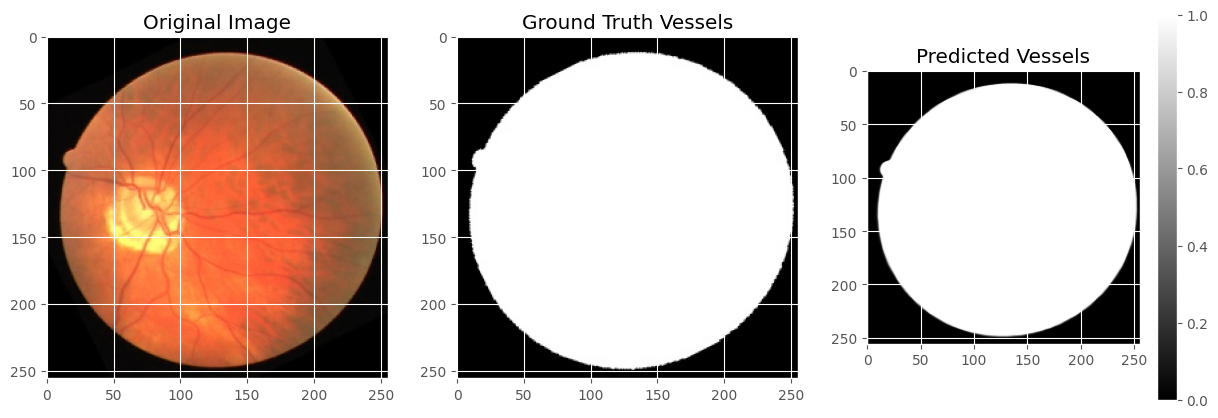

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Load your saved model
model = tf.keras.models.load_model('/content/unet_drive.h5')

# Select a validation image
sample_image = X_val_drive[0]  # Shape: (256,256,3)
sample_mask = Y_val_drive[0]   # Ground truth

# Predict
pred = model.predict(np.expand_dims(sample_image, axis=0))[0]  # Shape: (256,256,1)

# Plot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sample_image)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(np.squeeze(sample_mask), cmap='gray')
plt.title("Ground Truth Vessels")

plt.subplot(1,3,3)
plt.imshow(np.squeeze(pred), cmap='gray', vmin=0, vmax=1)
plt.title("Predicted Vessels")
plt.colorbar()
plt.show()

In [ ]:
# Compile and Train U-Net
model = build_unet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

EPOCHS = 25
history = model.fit(X_train_stare, Y_train_stare, validation_data=(X_val_stare, Y_val_stare), epochs=EPOCHS, batch_size=8)

# Save Model
model.save("/content/unet_stare.h5")
print("✅ U-Net Model Saved!")


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_112']
Received: inputs=Tensor(shape=(8, 256, 256, 3))
  warnings.warn(msg)


8/8 ━━━━━━━━━━━━━━━━━━━━ 277s 34s/step - accuracy: 0.4758 - loss: 0.5700 - val_accuracy: 0.6723 - val_loss: 0.3453
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 267s 34s/step - accuracy: 0.7012 - loss: 0.3151 - val_accuracy: 0.6723 - val_loss: 0.2584
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 323s 34s/step - accuracy: 0.6993 - loss: 0.2550 - val_accuracy: 0.6723 - val_loss: 0.2493
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 322s 34s/step - accuracy: 0.6897 - loss: 0.2467 - val_accuracy: 0.6723 - val_loss: 0.2478
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 322s 34s/step - accuracy: 0.6880 - loss: 0.2408 - val_accuracy: 0.6723 - val_loss: 0.2476
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 325s 34s/step - accuracy: 0.6773 - loss: 0.2451 - val_accuracy: 0.6723 - val_loss: 0.2437
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 321s 34s/step - accuracy: 0.6948 - loss: 0.2383 - val_accuracy: 0.6723 - val_loss: 0.2431
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 341s 36s/step - accuracy: 0.6718 - loss: 0.2403 - val_accuracy: 0.6723 - val_loss: 0.2422
Epo